#**DDoS Detection**

In [226]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,  LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree

In [179]:
data = [
    {"ts":1721720859.349214,"uid":"Cw1Dxd30Y4CiJa9oag","id.orig_h":"192.168.56.1","id.orig_p":63161,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720859.356418,"uid":"CjURSBVqUcaUdmKt","id.orig_h":"192.168.56.1","id.orig_p":63162,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720861.20753,"uid":"C4f6ca1u5yjMXHSSHh","id.orig_h":"192.168.56.1","id.orig_p":63164,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720861.209452,"uid":"CMplUhZlO7x4SYyI","id.orig_h":"192.168.56.1","id.orig_p":63165,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720810.593255,"uid":"CnfR7z3LpkWOv5lBb7","id.orig_h":"192.168.56.102","id.orig_p":54393,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0258889198303223,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720863.959089,"uid":"CE9zGq3fYVEDvkxGKi","id.orig_h":"192.168.56.1","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":73,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720863.961895,"uid":"C3eokfOj0x4uaDSx8","id.orig_h":"fe80::7742:13a8:f428:6c03","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":93,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720811.533523,"uid":"CCQazt1neG5RnjZ12e","id.orig_h":"192.168.56.1","id.orig_p":53945,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.001952886581421,"orig_bytes":700,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":812,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720811.553542,"uid":"CKcqmDcFH2jpNPbh8","id.orig_h":"192.168.56.1","id.orig_p":53947,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0026791095733643,"orig_bytes":680,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":792,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720811.557551,"uid":"CyvASnlZNf8JoQB75","id.orig_h":"192.168.56.1","id.orig_p":53949,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.002587080001831,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720864.225036,"uid":"CTctAi3VWexC7GqNBe","id.orig_h":"192.168.56.1","id.orig_p":62835,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":153,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720926.776284,"uid":"CCS9yu22S0sMYB1V87","id.orig_h":"192.168.56.1","id.orig_p":63233,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","duration":3.000854015350342,"orig_bytes":0,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":3,"orig_ip_bytes":156,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720926.776378,"uid":"C4ah9x2sHoNmjf5wX4","id.orig_h":"192.168.56.1","id.orig_p":63234,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","duration":3.000444173812866,"orig_bytes":0,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":3,"orig_ip_bytes":156,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720928.838211,"uid":"CmKsg71QL6EMQlR8se","id.orig_h":"192.168.56.1","id.orig_p":63235,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","duration":3.0056660175323486,"orig_bytes":0,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":3,"orig_ip_bytes":156,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720928.838916,"uid":"ChcxSx4GxAJYZunaV4","id.orig_h":"192.168.56.1","id.orig_p":63236,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","duration":3.0049638748168945,"orig_bytes":0,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":3,"orig_ip_bytes":156,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720925.727282,"uid":"CdI35u4CymJyvT4Gw2","id.orig_h":"192.168.56.102","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.0022439956665039063,"orig_bytes":114,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":170,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720925.727887,"uid":"C6Cjwf4WTvRvIl4V","id.orig_h":"fe80::5ad5:310d:ce7a:e695","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.0016369819641113281,"orig_bytes":114,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":210,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720933.777799,"uid":"Ch77Hoxf9DpCBg9Ud","id.orig_h":"192.168.56.1","id.orig_p":63233,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720933.780826,"uid":"CVPNi73ie6K9zfyO0l","id.orig_h":"192.168.56.1","id.orig_p":63234,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720935.844325,"uid":"CtoRm7392pougQiL4l","id.orig_h":"192.168.56.1","id.orig_p":63235,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720935.844327,"uid":"CS9fmfOSsniI0EMu4","id.orig_h":"192.168.56.1","id.orig_p":63236,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720941.777508,"uid":"CI56wt4vBj3RBfK3Ga","id.orig_h":"192.168.56.1","id.orig_p":63233,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720941.780364,"uid":"CYoIth4vdIt33bRpM9","id.orig_h":"192.168.56.1","id.orig_p":63234,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720943.844565,"uid":"CNnfVL1c5yRPkbXB8j","id.orig_h":"192.168.56.1","id.orig_p":63236,"id.resp_h":"192.168.56.102","id.resp_p":80,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720943.858027,"uid":"CPTMBQ2h8p1GEymTel","id.orig_h":"192.168.56.1","id.orig_p":63235,"id.resp_h":"192.168.56.102","id.resp_p":443,"proto":"tcp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"S","orig_pkts":1,"orig_ip_bytes":52,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720895.131163,"uid":"CBwJ7A36gFUIPIOFig","id.orig_h":"192.168.56.1","id.orig_p":57621,"id.resp_h":"192.168.56.255","id.resp_p":57621,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":72,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720925.413115,"uid":"Ccqgvv1FtTTP2izKP9","id.orig_h":"192.168.56.102","id.orig_p":68,"id.resp_h":"192.168.56.100","id.resp_p":67,"proto":"udp","service":"dhcp","duration":0.14412689208984375,"orig_bytes":314,"resp_bytes":548,"conn_state":"SF","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"Dd","orig_pkts":1,"orig_ip_bytes":342,"resp_pkts":1,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720925.662422,"uid":"CJBZwv3QiCa0uYb6M8","id.orig_h":"fe80::5ad5:310d:ce7a:e695","id.orig_p":143,"id.resp_h":"ff02::16","id.resp_p":0,"proto":"icmp","duration":0.2783620357513428,"orig_bytes":100,"resp_bytes":0,"conn_state":"OTH","local_orig":True,"local_resp":False,"missed_bytes":0,"orig_pkts":5,"orig_ip_bytes":380,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720930.578203,"uid":"C5Iw8Y2OcsbA0SUg1d","id.orig_h":"192.168.56.102","id.orig_p":52404,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0251669883728027,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720983.962785,"uid":"CZ93Ol1F9E7KSJRRg7","id.orig_h":"192.168.56.1","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":73,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720983.965075,"uid":"C04a3t3G7uJF4OGNzh","id.orig_h":"fe80::7742:13a8:f428:6c03","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":93,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720931.551619,"uid":"CGuAIS2IAp7CAUt8P4","id.orig_h":"192.168.56.1","id.orig_p":63461,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0058858394622803,"orig_bytes":700,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":812,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720931.559623,"uid":"CvMGw22AbwwM6JOv8f","id.orig_h":"192.168.56.1","id.orig_p":63463,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0020151138305664,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720931.584998,"uid":"CLuxKU1Gdkz6yOx2S6","id.orig_h":"192.168.56.1","id.orig_p":63465,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.004859209060669,"orig_bytes":680,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":792,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721720984.249964,"uid":"C1MAZa4DSfz3Tc3w8c","id.orig_h":"192.168.56.1","id.orig_p":62835,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":153,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721005.132415,"uid":"CODIdn2YsFAMtHkPP5","id.orig_h":"192.168.56.1","id.orig_p":138,"id.resp_h":"192.168.56.255","id.resp_p":138,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":229,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721032.123456,"uid":"D4ef8c2EoYkPqVjz","id.orig_h":"192.168.56.1","id.orig_p":140,"id.resp_h":"192.168.56.103","id.resp_p":140,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":60,"orig_ip_bytes":600,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721032.234567,"uid":"D5gh2h3ZrGkZrF3c","id.orig_h":"192.168.56.102","id.orig_p":145,"id.resp_h":"192.168.56.255","id.resp_p":145,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":70,"orig_ip_bytes":890,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721032.345678,"uid":"E6ij4i4ArLhTzH5d","id.orig_h":"192.168.56.1","id.orig_p":150,"id.resp_h":"192.168.56.105","id.resp_p":150,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":80,"orig_ip_bytes":1000,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721032.456789,"uid":"F7jk5j5BsMuUyI6e","id.orig_h":"192.168.56.1","id.orig_p":155,"id.resp_h":"192.168.56.106","id.resp_p":155,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":90,"orig_ip_bytes":1200,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721032.567890,"uid":"G8kl6k6CtNvVzJ7f","id.orig_h":"192.168.56.6","id.orig_p":160,"id.resp_h":"192.168.56.107","id.resp_p":160,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":100,"orig_ip_bytes":900,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721032.678901,"uid":"H9lm7l7DuOwWzK8g","id.orig_h":"192.168.56.7","id.orig_p":165,"id.resp_h":"192.168.56.106","id.resp_p":165,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":110,"orig_ip_bytes":700,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721031.887296,"uid":"CymPGq101TGdrI6qZa","id.orig_h":"192.168.56.101","id.orig_p":68,"id.resp_h":"192.168.56.100","id.resp_p":67,"proto":"udp","service":"dhcp","duration":0.2798190116882324,"orig_bytes":0,"resp_bytes":548,"conn_state":"SHR","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"Cd","orig_pkts":0,"orig_ip_bytes":0,"resp_pkts":1,"resp_ip_bytes":576, "label": 0},
  {"ts":1721721032.234775,"uid":"C9ho754iJoKYOAovic","id.orig_h":"fe80::3964:61ae:16af:222e","id.orig_p":143,"id.resp_h":"ff02::16","id.resp_p":0,"proto":"icmp","duration":0.7112889289855957,"orig_bytes":80,"resp_bytes":0,"conn_state":"OTH","local_orig":True,"local_resp":False,"missed_bytes":0,"orig_pkts":2,"orig_ip_bytes":192,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721050.558221,"uid":"CNQRxG1OYecsnmcFFg","id.orig_h":"192.168.56.102","id.orig_p":54166,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0229458808898926,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721103.953569,"uid":"CGK14o1xDthJ6lEiI7","id.orig_h":"192.168.56.1","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":73,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721103.963905,"uid":"Ct6P2B2YYomz7bXfjl","id.orig_h":"fe80::7742:13a8:f428:6c03","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":93,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721051.500459,"uid":"CYtO1L3xLj6xZ3Q9Fd","id.orig_h":"192.168.56.1","id.orig_p":53494,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0022900104522705,"orig_bytes":700,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":812,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721051.538982,"uid":"C64os34NwMJATbCrng","id.orig_h":"192.168.56.1","id.orig_p":53496,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0033531188964844,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721051.547244,"uid":"C6G5bplWAvz8rj2he","id.orig_h":"192.168.56.1","id.orig_p":53498,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0049428939819336,"orig_bytes":680,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":792,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721070.995347,"uid":"C4kpLSnyzTGDdRTW7","id.orig_h":"192.168.56.1","id.orig_p":57621,"id.resp_h":"192.168.56.255","id.resp_p":57621,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":72,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721133.867205,"uid":"CDuiRO3LjX2qLj7Un9","id.orig_h":"192.168.56.102","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.9973452091217041,"orig_bytes":86,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":142,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721133.872893,"uid":"Cp8iAh2XcbkNycHol4","id.orig_h":"fe80::5ad5:310d:ce7a:e695","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.9924378395080566,"orig_bytes":86,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":182,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721104.217534,"uid":"CD8tU4HBilaDtsAMl","id.orig_h":"192.168.56.1","id.orig_p":62835,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":153,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721170.582889,"uid":"ClxKTj1MtXTgSDGjDg","id.orig_h":"192.168.56.102","id.orig_p":60830,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.031157970428467,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721223.989637,"uid":"CHrdVL1hcV8CDZ5FM","id.orig_h":"192.168.56.1","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":73,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721223.99265,"uid":"C0XExH22vmrzVMWJK9","id.orig_h":"fe80::7742:13a8:f428:6c03","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":93,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721226.234979,"uid":"CVWb631jx2ujKmhIKh","id.orig_h":"192.168.56.102","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.002079010009765625,"orig_bytes":114,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":170,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721226.235922,"uid":"Cg68sg15yUUAhmqDye","id.orig_h":"fe80::5ad5:310d:ce7a:e695","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","duration":0.0006968975067138672,"orig_bytes":114,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":2,"orig_ip_bytes":210,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721174.814468,"uid":"C88aUS1EvmvrAsamRl","id.orig_h":"192.168.56.1","id.orig_p":53420,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0084800720214844,"orig_bytes":680,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":792,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721174.847416,"uid":"CKkihF1i6Ov6tlz653","id.orig_h":"192.168.56.1","id.orig_p":53422,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0049850940704346,"orig_bytes":700,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":812,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721174.882328,"uid":"CLMxrx7LgRUoFeSBl","id.orig_h":"192.168.56.1","id.orig_p":53424,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0060269832611084,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721224.253101,"uid":"CkcfTZ1r5Pfone9IT","id.orig_h":"192.168.56.1","id.orig_p":62835,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":153,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721225.756386,"uid":"CUDDKC4kBSNth9rBkj","id.orig_h":"192.168.56.102","id.orig_p":68,"id.resp_h":"192.168.56.100","id.resp_p":67,"proto":"udp","service":"dhcp","duration":0.2997589111328125,"orig_bytes":314,"resp_bytes":548,"conn_state":"SF","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"Dd","orig_pkts":1,"orig_ip_bytes":342,"resp_pkts":1,"resp_ip_bytes":576, "label": 0},
  {"ts":1721721226.199708,"uid":"CqXpYg3YfktNSzWTD7","id.orig_h":"fe80::5ad5:310d:ce7a:e695","id.orig_p":143,"id.resp_h":"ff02::16","id.resp_p":0,"proto":"icmp","duration":0.2568240165710449,"orig_bytes":100,"resp_bytes":0,"conn_state":"OTH","local_orig":True,"local_resp":False,"missed_bytes":0,"orig_pkts":5,"orig_ip_bytes":380,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721227.153421,"uid":"CCSTH02MZCc7aVXhwb","id.orig_h":"192.168.56.1","id.orig_p":49642,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":6.00380802154541,"orig_bytes":411,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":3,"orig_ip_bytes":495,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721228.174932,"uid":"CzoRg420sbKmqHhMY3","id.orig_h":"192.168.56.1","id.orig_p":57621,"id.resp_h":"192.168.56.255","id.resp_p":57621,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":72,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721229.198765,"uid":"L3pq1p1HyS0AdO2k","id.orig_h":"192.168.56.11","id.orig_p":185,"id.resp_h":"192.168.56.112","id.resp_p":185,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":150,"orig_ip_bytes":200,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721230.213456,"uid":"M4qr2q2IzT1BeP3l","id.orig_h":"192.168.56.12","id.orig_p":190,"id.resp_h":"192.168.56.113","id.resp_p":190,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":160,"orig_ip_bytes":700,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721231.232789,"uid":"N5rs3r3JxU2CfQ4m","id.orig_h":"192.168.56.13","id.orig_p":195,"id.resp_h":"192.168.56.114","id.resp_p":195,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":170,"orig_ip_bytes":1500,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721232.253678,"uid":"O6st4s4KyV3DgR5n","id.orig_h":"192.168.56.14","id.orig_p":200,"id.resp_h":"192.168.56.115","id.resp_p":200,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":180,"orig_ip_bytes":1200,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721233.275453,"uid":"K2op0o0GxRzZcN1j","id.orig_h":"192.168.56.10","id.orig_p":180,"id.resp_h":"192.168.56.111","id.resp_p":180,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"D","orig_pkts":140,"orig_ip_bytes":600,"resp_pkts":0,"resp_ip_bytes":0, "label": 1},
  {"ts":1721721234.298765,"uid":"C4z5zJ35mUaB7cI1Ch","id.orig_h":"192.168.56.1","id.orig_p":61397,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0043840408325195,"orig_bytes":700,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":812,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721235.312678,"uid":"Com2Ph4DfQ02NtZQj9","id.orig_h":"192.168.56.1","id.orig_p":5353,"id.resp_h":"224.0.0.251","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":73,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721236.324589,"uid":"CnfXLG2zKl1S7q1QN3","id.orig_h":"fe80::7742:13a8:f428:6c03","id.orig_p":5353,"id.resp_h":"ff02::fb","id.resp_p":5353,"proto":"udp","service":"dns","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":93,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721291.573532,"uid":"CKJr9j4ZPnMpaYXBsb","id.orig_h":"192.168.56.1","id.orig_p":61399,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.0043158531188965,"orig_bytes":704,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":816,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721291.596272,"uid":"CxUfYb1ecCPluyroY5","id.orig_h":"192.168.56.1","id.orig_p":61401,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","duration":3.006232976913452,"orig_bytes":680,"resp_bytes":0,"conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":4,"orig_ip_bytes":792,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721331.890264,"uid":"CLmnlFBSAmNnv7hjh","id.orig_h":"192.168.56.101","id.orig_p":68,"id.resp_h":"192.168.56.100","id.resp_p":67,"proto":"udp","service":"dhcp","duration":0.1649160385131836,"orig_bytes":0,"resp_bytes":548,"conn_state":"SHR","local_orig":True,"local_resp":True,"missed_bytes":0,"history":"Cd","orig_pkts":0,"orig_ip_bytes":0,"resp_pkts":1,"resp_ip_bytes":576, "label": 0},
  {"ts":1721721332.086121,"uid":"CblFLM2hevTkskPjX5","id.orig_h":"fe80::3964:61ae:16af:222e","id.orig_p":143,"id.resp_h":"ff02::16","id.resp_p":0,"proto":"icmp","duration":0.02786397933959961,"orig_bytes":80,"resp_bytes":0,"conn_state":"OTH","local_orig":True,"local_resp":False,"missed_bytes":0,"orig_pkts":2,"orig_ip_bytes":192,"resp_pkts":0,"resp_ip_bytes":0, "label": 0},
  {"ts":1721721344.237572,"uid":"CjmUZe2hOwsHVxXarb","id.orig_h":"192.168.56.1","id.orig_p":62835,"id.resp_h":"239.255.255.250","id.resp_p":1900,"proto":"udp","conn_state":"S0","local_orig":True,"local_resp":False,"missed_bytes":0,"history":"D","orig_pkts":1,"orig_ip_bytes":153,"resp_pkts":0,"resp_ip_bytes":0, "label": 0}
]

In [180]:
df = pd.DataFrame(data)

In [181]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,local_orig,local_resp,...,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,duration,orig_bytes,resp_bytes,service
0,1.721721e+09,Cw1Dxd30Y4CiJa9oag,192.168.56.1,63161,192.168.56.102,80,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
1,1.721721e+09,CjURSBVqUcaUdmKt,192.168.56.1,63162,192.168.56.102,443,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
2,1.721721e+09,C4f6ca1u5yjMXHSSHh,192.168.56.1,63164,192.168.56.102,443,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
3,1.721721e+09,CMplUhZlO7x4SYyI,192.168.56.1,63165,192.168.56.102,80,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
4,1.721721e+09,CnfR7z3LpkWOv5lBb7,192.168.56.102,54393,239.255.255.250,1900,udp,S0,True,False,...,D,4,816,0,0,0,3.025889,704.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.721721e+09,CKJr9j4ZPnMpaYXBsb,192.168.56.1,61399,239.255.255.250,1900,udp,S0,True,False,...,D,4,816,0,0,0,3.004316,704.0,0.0,NaN
76,1.721721e+09,CxUfYb1ecCPluyroY5,192.168.56.1,61401,239.255.255.250,1900,udp,S0,True,False,...,D,4,792,0,0,0,3.006233,680.0,0.0,NaN
77,1.721721e+09,CLmnlFBSAmNnv7hjh,192.168.56.101,68,192.168.56.100,67,udp,SHR,True,True,...,Cd,0,0,1,576,0,0.164916,0.0,548.0,dhcp
78,1.721721e+09,CblFLM2hevTkskPjX5,fe80::3964:61ae:16af:222e,143,ff02::16,0,icmp,OTH,True,False,...,NaN,2,192,0,0,0,0.027864,80.0,0.0,NaN


In [182]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'conn_state', 'local_orig', 'local_resp', 'missed_bytes',
       'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'label', 'duration', 'orig_bytes', 'resp_bytes', 'service'],
      dtype='object')

In [183]:
# converting ts values to date-time format
df['ts'] = pd.to_datetime(df['ts'])

In [184]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,local_orig,local_resp,...,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,duration,orig_bytes,resp_bytes,service
0,1970-01-01 00:00:01.721720859,Cw1Dxd30Y4CiJa9oag,192.168.56.1,63161,192.168.56.102,80,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
1,1970-01-01 00:00:01.721720859,CjURSBVqUcaUdmKt,192.168.56.1,63162,192.168.56.102,443,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
2,1970-01-01 00:00:01.721720861,C4f6ca1u5yjMXHSSHh,192.168.56.1,63164,192.168.56.102,443,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
3,1970-01-01 00:00:01.721720861,CMplUhZlO7x4SYyI,192.168.56.1,63165,192.168.56.102,80,tcp,S0,True,True,...,S,1,52,0,0,0,NaN,NaN,NaN,NaN
4,1970-01-01 00:00:01.721720810,CnfR7z3LpkWOv5lBb7,192.168.56.102,54393,239.255.255.250,1900,udp,S0,True,False,...,D,4,816,0,0,0,3.025889,704.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1970-01-01 00:00:01.721721291,CKJr9j4ZPnMpaYXBsb,192.168.56.1,61399,239.255.255.250,1900,udp,S0,True,False,...,D,4,816,0,0,0,3.004316,704.0,0.0,NaN
76,1970-01-01 00:00:01.721721291,CxUfYb1ecCPluyroY5,192.168.56.1,61401,239.255.255.250,1900,udp,S0,True,False,...,D,4,792,0,0,0,3.006233,680.0,0.0,NaN
77,1970-01-01 00:00:01.721721331,CLmnlFBSAmNnv7hjh,192.168.56.101,68,192.168.56.100,67,udp,SHR,True,True,...,Cd,0,0,1,576,0,0.164916,0.0,548.0,dhcp
78,1970-01-01 00:00:01.721721332,CblFLM2hevTkskPjX5,fe80::3964:61ae:16af:222e,143,ff02::16,0,icmp,OTH,True,False,...,NaN,2,192,0,0,0,0.027864,80.0,0.0,NaN


## Pre-processing and Analysis

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ts             80 non-null     datetime64[ns]
 1   uid            80 non-null     object        
 2   id.orig_h      80 non-null     object        
 3   id.orig_p      80 non-null     int64         
 4   id.resp_h      80 non-null     object        
 5   id.resp_p      80 non-null     int64         
 6   proto          80 non-null     object        
 7   conn_state     80 non-null     object        
 8   local_orig     80 non-null     bool          
 9   local_resp     80 non-null     bool          
 10  missed_bytes   80 non-null     int64         
 11  history        76 non-null     object        
 12  orig_pkts      80 non-null     int64         
 13  orig_ip_bytes  80 non-null     int64         
 14  resp_pkts      80 non-null     int64         
 15  resp_ip_bytes  80 non-nul

In [187]:
# total missing values in each attribute
df.isnull().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           4
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
label             0
duration         42
orig_bytes       42
resp_bytes       42
service          60
dtype: int64

In [188]:
df = df.drop(columns = ['service', 'history', 'uid', 'id.orig_p', 'id.resp_p'])

<Axes: >

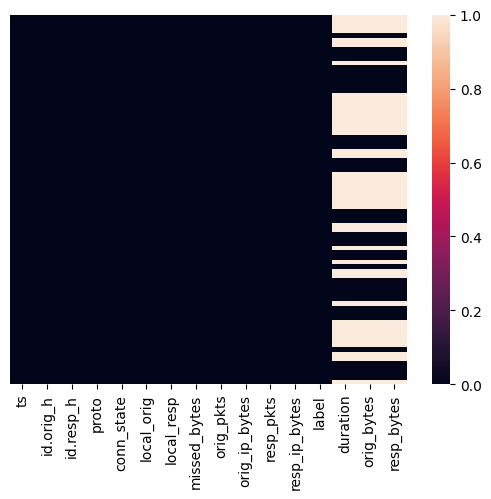

In [189]:
# visualisation of number of missing values
sns.heatmap(df.isnull(), yticklabels= False)

### Markers for DDoS
- Timestamp: The time at which the data point was recorded.
- PacketsPerSecond: The number of packets received per second.
- BytesPerSecond: The amount of data (in bytes) received per second.
- UniqueSourceIPs: The number of unique source IP addresses sending traffic.
- DroppedPackets: The number of packets dropped by network devices due to overload or other issues.
- CPUUsage: CPU usage of network devices.
- MemoryUsage: Memory usage of network devices.


In [190]:
# Connection characteristics
df['bytes_per_pkt'] = df['orig_bytes'] / df['orig_pkts']
df['pkts_per_sec'] = df['orig_pkts'] / df['duration']

# Fill inf and NaN values generated by division
df.replace([float('inf'), -float('inf')], 0, inplace=True)
df.fillna(0, inplace=True)

In [191]:
df

,ts,id.orig_h,id.resp_h,proto,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,duration,orig_bytes,resp_bytes,bytes_per_pkt,pkts_per_sec
0,1970-01-01 00:00:01.721720859,192.168.56.1,192.168.56.102,tcp,S0,True,True,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
1,1970-01-01 00:00:01.721720859,192.168.56.1,192.168.56.102,tcp,S0,True,True,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
2,1970-01-01 00:00:01.721720861,192.168.56.1,192.168.56.102,tcp,S0,True,True,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
3,1970-01-01 00:00:01.721720861,192.168.56.1,192.168.56.102,tcp,S0,True,True,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
4,1970-01-01 00:00:01.721720810,192.168.56.102,239.255.255.250,udp,S0,True,False,0,4,816,0,0,0,3.025889,704.0,0.0,176.0,1.321926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1970-01-01 00:00:01.721721291,192.168.56.1,239.255.255.250,udp,S0,True,False,0,4,816,0,0,0,3.004316,704.0,0.0,176.0,1.331418
76,1970-01-01 00:00:01.721721291,192.168.56.1,239.255.255.250,udp,S0,True,False,0,4,792,0,0,0,3.006233,680.0,0.0,170.0,1.330569
77,1970-01-01 00:00:01.721721331,192.168.56.101,192.168.56.100,udp,SHR,True,True,0,0,0,1,576,0,0.164916,0.0,548.0,0.0,0.000000
78,1970-01-01 00:00:01.721721332,fe80::3964:61ae:16af:222e,ff02::16,icmp,OTH,True,False,0,2,192,0,0,0,0.027864,80.0,0.0,40.0,71.777257


In [192]:
# Count no. of unique IP addresses
unique_ips = len(pd.concat([df['id.orig_h'], df['id.resp_h']]).unique())
unique_ips

28

In [193]:
# count freq of each connection state
from collections import Counter
state_counts = Counter(df['conn_state'])
state_counts

Counter({'S0': 72, 'SF': 2, 'OTH': 4, 'SHR': 2})

In [194]:
# Count no. of events per protocol
protocol_counts = Counter(df['proto'])
protocol_counts

Counter({'tcp': 16, 'udp': 60, 'icmp': 4})

<ipython-input-195-513cd3dd613d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ts'], y=df['bytes_per_pkt'], palette='viridis')


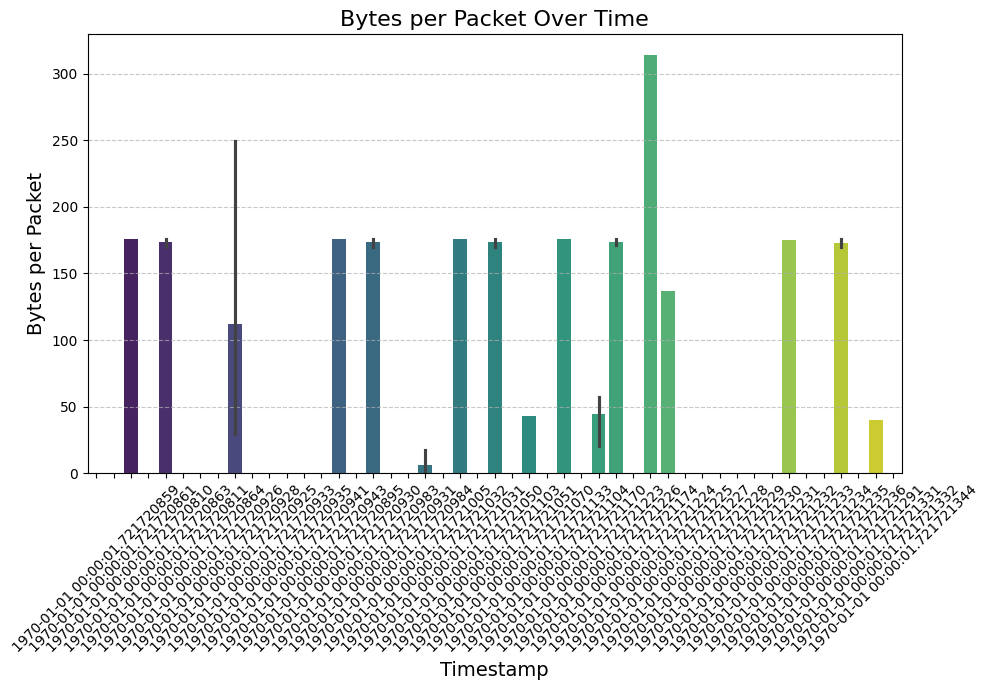

In [195]:
plt.figure(figsize=(10, 7))
sns.barplot(x=df['ts'], y=df['bytes_per_pkt'], palette='viridis')


plt.title('Bytes per Packet Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Bytes per Packet', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

<ipython-input-196-2a88a1b1aba6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['ts'], y=df['orig_pkts'], palette='viridis')


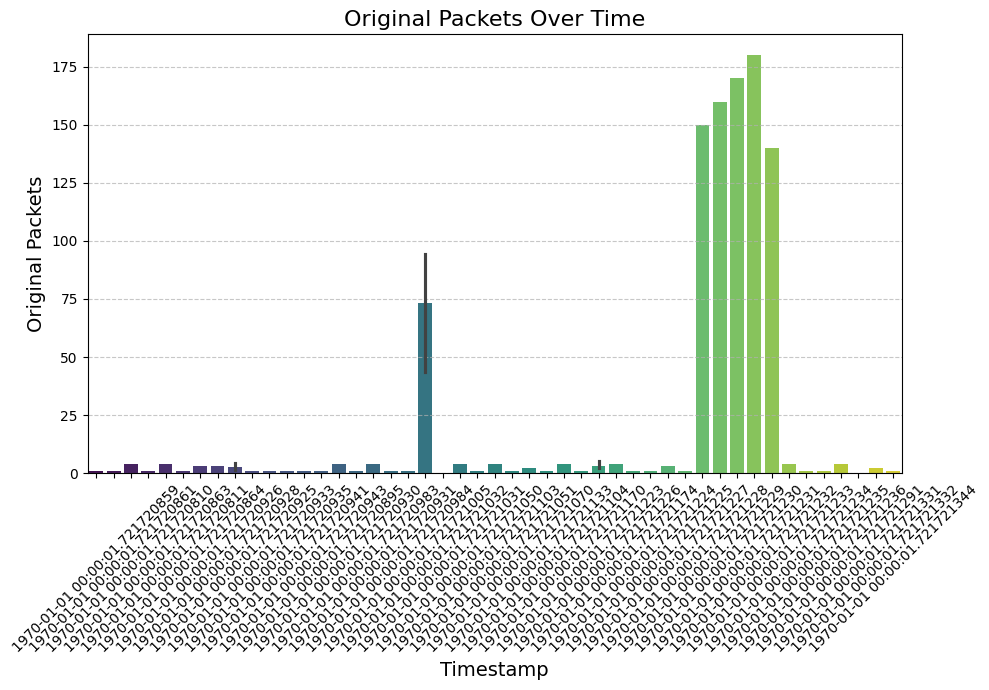

In [196]:
plt.figure(figsize=(10, 7))
sns.barplot(x=df['ts'], y=df['orig_pkts'], palette='viridis')


plt.title('Original Packets Over Time', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Original Packets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

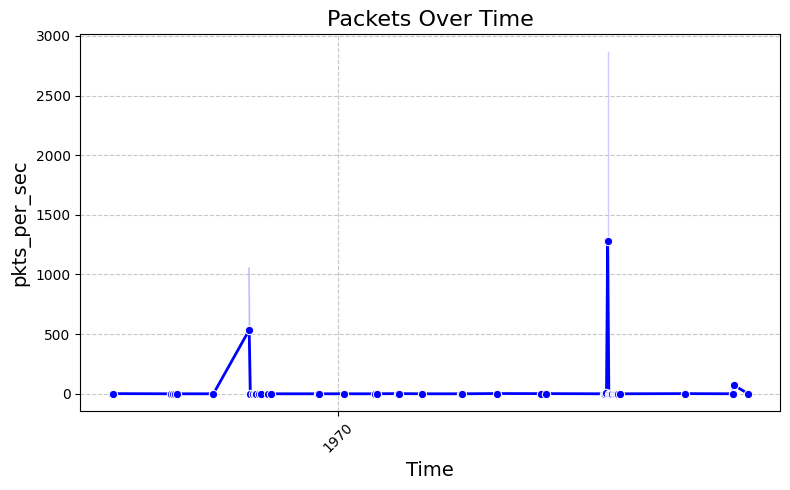

In [197]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='ts', y='pkts_per_sec', data=df, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Packets Over Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('pkts_per_sec', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Data Encoding

In [198]:
df = df.drop(columns=['ts'])

In [199]:
categorical_columns = ['proto', 'conn_state', 'local_orig', 'local_resp', 'id.orig_h','id.resp_h']

In [200]:
label_encoders = {}

In [201]:
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [202]:
df

,id.orig_h,id.resp_h,proto,conn_state,local_orig,local_resp,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,duration,orig_bytes,resp_bytes,bytes_per_pkt,pkts_per_sec
0,0,1,1,1,0,1,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
1,0,1,1,1,0,1,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
2,0,1,1,1,0,1,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
3,0,1,1,1,0,1,0,1,52,0,0,0,0.000000,0.0,0.0,0.0,0.000000
4,3,13,2,1,0,0,0,4,816,0,0,0,3.025889,704.0,0.0,176.0,1.321926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,13,2,1,0,0,0,4,816,0,0,0,3.004316,704.0,0.0,176.0,1.331418
76,0,13,2,1,0,0,0,4,792,0,0,0,3.006233,680.0,0.0,170.0,1.330569
77,2,0,2,3,0,1,0,0,0,1,576,0,0.164916,0.0,548.0,0.0,0.000000
78,10,14,0,0,0,0,0,2,192,0,0,0,0.027864,80.0,0.0,40.0,71.777257


# Normalization

In [203]:
colmns = [ 'duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']

In [204]:
scaler = MinMaxScaler()
df[colmns] = scaler.fit_transform(df[colmns])

In [205]:
X = df.drop(columns=["label"])
y = df["label"]

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## RandomForest

In [207]:
clf = RandomForestClassifier(n_estimators=45)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=45)

In [208]:
y_pred = clf.predict(X_test)

In [209]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

In [210]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[15  0]
 [ 0  1]]


Accuracy_score: 100.0
precision_score: 100.0
recall_score: 100.0
f1_score: 100.0


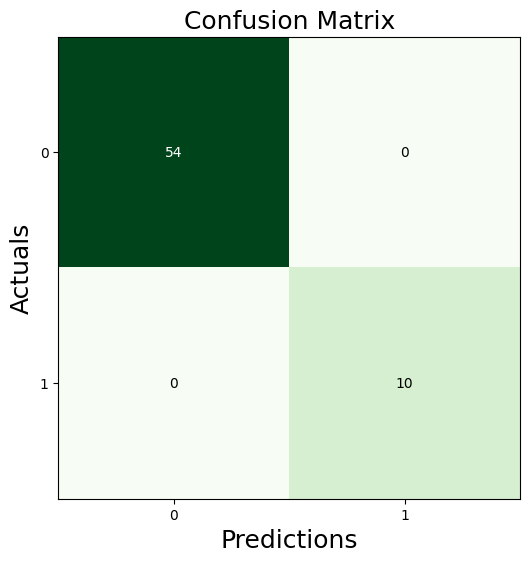

In [225]:
output(RandomForestClassifier(n_estimators=15),X_train,X_test,y_train,y_test,folds)

In [219]:
# create 10 folds for cross validation
folds=StratifiedKFold(n_splits=10)
folds


StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [220]:
def output(model, x_train,x_test,y_train,y_test,folds):
  y_pred = cross_val_predict(model, x_train, y_train, cv=folds)
  print(f"Accuracy_score: {accuracy_score(y_pred,y_train)*100}",)
  print(f"precision_score: {precision_score(y_train, y_pred)*100}")
  print(f"recall_score: {recall_score(y_train, y_pred)*100}")
  print(f"f1_score: {f1_score(y_train, y_pred)*100}")
  matrix=confusion_matrix(y_train, y_pred)
  fig, ax = plot_confusion_matrix(conf_mat=matrix, figsize=(6, 6), cmap=plt.cm.Greens)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()


## logistic regression

Accuracy_score: 98.4375
precision_score: 100.0
recall_score: 90.0
f1_score: 94.73684210526316


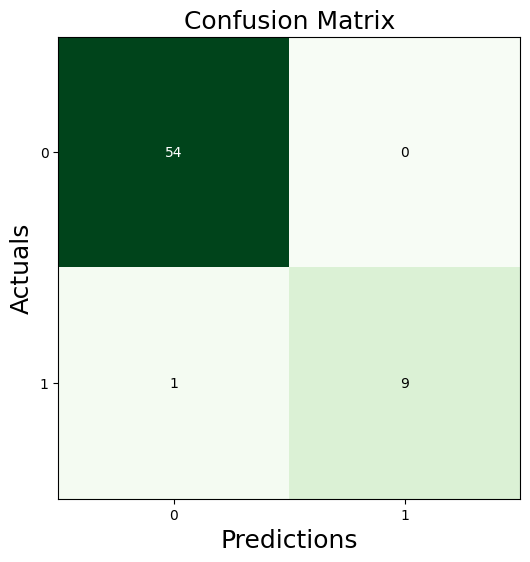

In [223]:
# logistic regression(liblinear) model
output(LogisticRegression(solver='liblinear',multi_class='ovr'),X_train,X_test,y_train,y_test,folds)

## decision tree

Accuracy_score: 100.0
precision_score: 100.0
recall_score: 100.0
f1_score: 100.0


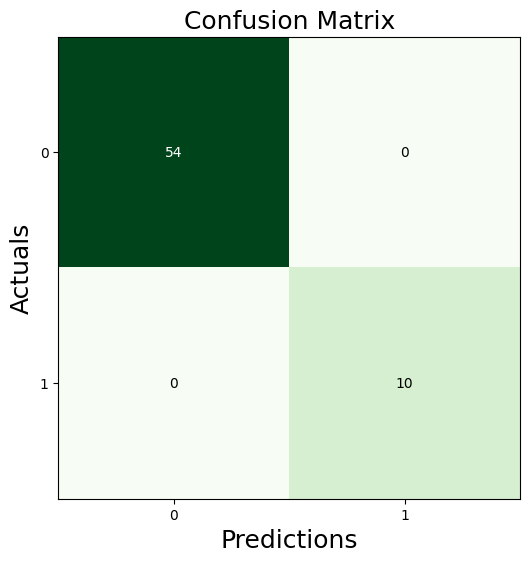

In [227]:
# decision tree model
output(tree.DecisionTreeClassifier(),X_train,X_test,y_train,y_test,folds)

## naive bayes

Accuracy_score: 93.75
precision_score: 71.42857142857143
recall_score: 100.0
f1_score: 83.33333333333333


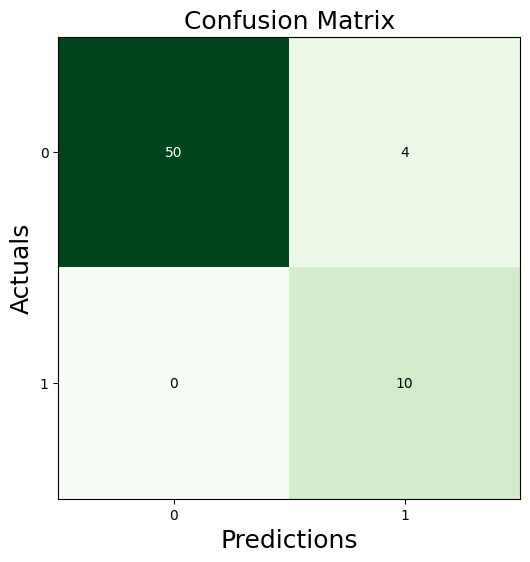

In [228]:

# gaussian naive bayes model
output(GaussianNB(),X_train,X_test,y_train,y_test,folds)


## KNN model

Accuracy_score: 98.4375
precision_score: 100.0
recall_score: 90.0
f1_score: 94.73684210526316


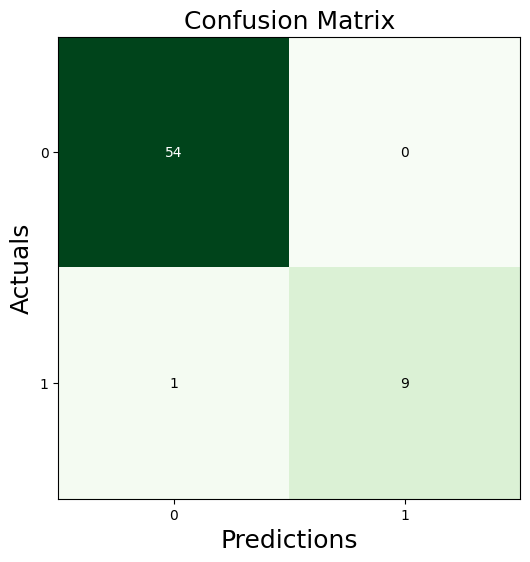

In [229]:

# KNN model with 1 neighbor
output(KNeighborsClassifier(n_neighbors = 1),X_train,X_test,y_train,y_test,folds)

# Alert Generation for response playbook initiation





In [213]:
!pip install twilio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00


In [214]:
from twilio.rest import Client

In [215]:
account_sid = 'acc_sid'
auth_token = 'auth-token'
client = Client(account_sid, auth_token)

In [216]:
from_phone = '+17624658010'

to_phone = '+918955313837'

In [217]:
message_body = 'DDoS Detected, Incidence response playbook initiated.'

message = client.messages.create(
    body=message_body,
    from_=from_phone,
    to=to_phone
)

print(f"Message sent with SID: {message.sid}")